### Importing Libraries 📚

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [67]:
print(sns.__version__)

0.12.2


In [116]:
df = pd.read_csv('./dataset/ASII.JK.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-05,8400.0,8475.0,8250.0,8325.0,6583.352051,28909900.0
1,2018-12-06,8200.0,8250.0,8050.0,8100.0,6405.423340,55894200.0
2,2018-12-07,8100.0,8275.0,8075.0,8225.0,6504.271484,58677800.0
3,2018-12-10,8075.0,8175.0,8050.0,8150.0,6444.961914,23912000.0
4,2018-12-11,8150.0,8250.0,8150.0,8150.0,6444.961914,34673200.0


In [117]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-11-28,5675.0,5675.0,5550.0,5550.0,5550.0,86907600.0
1230,2023-11-29,5600.0,5650.0,5525.0,5525.0,5525.0,75070800.0
1231,2023-11-30,5575.0,5575.0,5400.0,5400.0,5400.0,161684600.0
1232,2023-12-01,5450.0,5750.0,5450.0,5750.0,5750.0,145374400.0
1233,2023-12-04,5750.0,5825.0,5725.0,5750.0,5750.0,57590700.0


In [118]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,6152.745337,6223.033252,6068.824006,6143.552311,5296.229402,4.410462e+07
std,964.483970,961.991161,964.353374,966.105677,844.282815,2.810169e+07
min,3220.000000,3610.000000,3220.000000,3280.000000,2672.494873,0.000000e+00
25%,5525.000000,5600.000000,5450.000000,5500.000000,4728.586914,2.723510e+07
50%,6175.000000,6250.000000,6075.000000,6150.000000,5386.582520,3.696070e+07
75%,6800.000000,6875.000000,6725.000000,6800.000000,5936.489258,5.350540e+07
max,8500.000000,8625.000000,8425.000000,8475.000000,6812.826660,3.114024e+08


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [120]:
df.shape

(1234, 7)

In [121]:
df.max()


Date          2023-12-04
Open              8500.0
High              8625.0
Low               8425.0
Close             8475.0
Adj Close     6812.82666
Volume       311402400.0
dtype: object

In [122]:
df.min()

Date          2018-12-05
Open              3220.0
High              3610.0
Low               3220.0
Close             3280.0
Adj Close    2672.494873
Volume               0.0
dtype: object

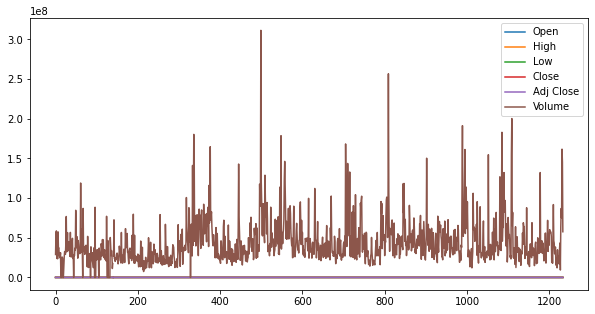

In [123]:
df.plot(figsize=(10,5))
plt.show()

### Data preprocessing

In [124]:
df = pd.read_csv('./dataset/ASII.JK.csv', index_col=['Date'], parse_dates=['Date'])
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-05,8400.0,8475.0,8250.0,8325.0,6583.352051,28909900.0
2018-12-06,8200.0,8250.0,8050.0,8100.0,6405.423340,55894200.0
2018-12-07,8100.0,8275.0,8075.0,8225.0,6504.271484,58677800.0
2018-12-10,8075.0,8175.0,8050.0,8150.0,6444.961914,23912000.0
2018-12-11,8150.0,8250.0,8150.0,8150.0,6444.961914,34673200.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2018-12-05 to 2023-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   float64
dtypes: float64(6)
memory usage: 67.5 KB


In [126]:
df.isnull().sum()


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [127]:
asii = df.fillna(df.mean())

In [128]:
asii.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

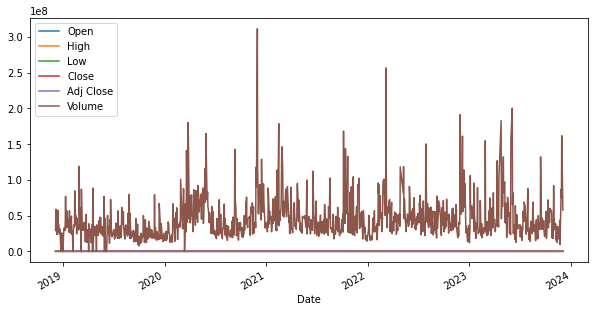

In [129]:
asii.plot(figsize=(10,5))
plt.show()

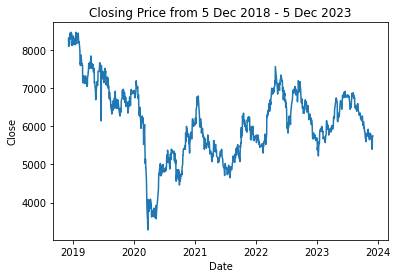

In [130]:
#selecting close price as features and try to plotting

sns.lineplot(data=asii, x="Date", y="Close")
plt.title("Closing Price from 5 Dec 2018 - 5 Dec 2023")
plt.show()

<Axes: >

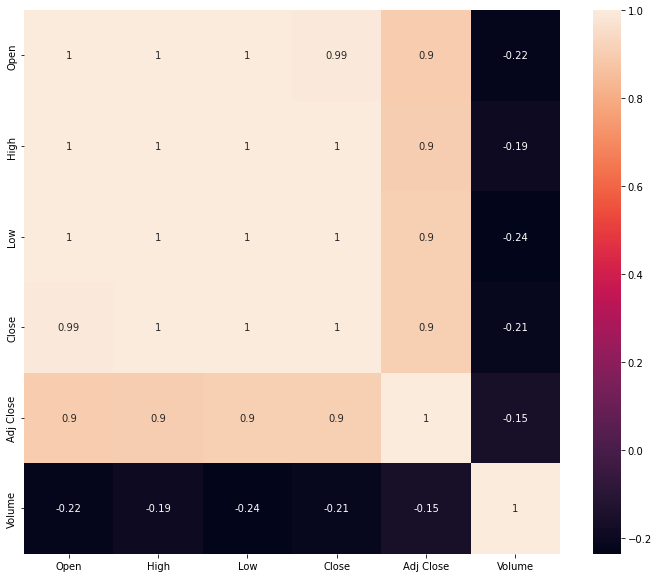

In [111]:
correlation = asii.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True)

#### Stationary Test 🚄

1. ADF Statistic: -2.83697817355688
2. p-value: 0.05318274786112874
3. lags:  6
4. number of observations:  1227
5. Critical values: 
	1%: -3.435690695421723
	5%: -2.863898416697677
	10%: -2.5680256555204184
Failed to reject H0 - Time series is Non-Stationary


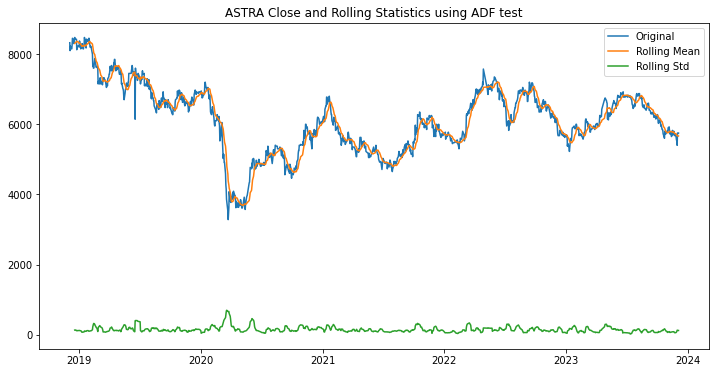

In [138]:
# Using Dickey-Fuller test
result = adfuller(asii['Close'])
print("1. ADF Statistic:", result[0])
print("2. p-value:", result[1])
print("3. lags: ", result[2])
print("4. number of observations: ", result[3])
print("5. Critical values: ")
for key, value in result[4].items():
        print("\t{}: {}".format(key, value))
if result[0] < result [4]["5%"]:
    print("Reject H0- Time series is Stationary")
else:
    print("Failed to reject H0 - Time series is Non-Stationary")

# plot rolling mean and standard deviation
rolling_mean = asii['Close'].rolling(window=12).mean()
rolling_std = asii['Close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(asii['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc = 'best')
plt.title('ASTRA Close and Rolling Statistics using ADF test')
plt.show()